In [4]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
# Specify data paths
dataset = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_new.csv'
model_save_path = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [6]:
# Change training classes if necessary
NUM_CLASSES = 10

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([105,  93,  90, 272, 237, 357, 230, 556, 121, 295]))


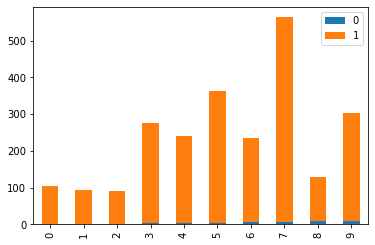

In [11]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [15]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3074 - accuracy: 0.1094
Epoch 00001: val_loss improved from inf to 2.16392, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 5ms/step - loss: 2.2366 - accuracy: 0.1749 - val_loss: 2.1639 - val_accuracy: 0.2564
Epoch 2/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.2151 - accuracy: 0.1875
Epoch 00002: val_loss improved from 2.16392 to 1.97288, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 2.0688 - accuracy: 0.2858 - val_loss: 1.9729 - val_accuracy: 0.2801
Epoch 3/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.9910 - accuracy: 0.2031
Epoch 00003: val_loss improved from 1.97288 to 1.77838, saving model to 

Epoch 21/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0595 - accuracy: 1.0000
Epoch 00021: val_loss improved from 0.05534 to 0.04794, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9972 - val_loss: 0.0479 - val_accuracy: 0.9983
Epoch 22/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0335 - accuracy: 1.0000
Epoch 00022: val_loss improved from 0.04794 to 0.04332, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9983 - val_loss: 0.0433 - val_accuracy: 0.9966
Epoch 23/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0597 - accuracy: 0.9844
Epoch 00023: val_loss improved from 0.04332 to 0.03612, saving mo

Epoch 42/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 00042: val_loss did not improve from 0.00958
28/28 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0099 - val_accuracy: 0.9983
Epoch 43/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 00043: val_loss improved from 0.00958 to 0.00776, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 44/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 00044: val_loss did not improve from 0.00776
28/28 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9983
Epoch 45/1000
 1/28 [>.....

Epoch 66/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 00066: val_loss did not improve from 0.00363
28/28 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9983
Epoch 67/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 00067: val_loss improved from 0.00363 to 0.00353, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9983
Epoch 68/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 00068: val_loss did not improve from 0.00353
28/28 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 69/1000
 1/28 [>.....

Epoch 91/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.00198
28/28 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 92/1000
 1/28 [>.............................] - ETA: 0s - loss: 4.4029e-04 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.00198
28/28 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 93/1000
 1/28 [>.............................] - ETA: 0s - loss: 9.5750e-04 - accuracy: 1.0000
Epoch 00093: val_loss did not improve from 0.00198
28/28 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 94/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 00094: val_loss did not improve from 0.00198
28/28 [======

Epoch 117/1000
 1/28 [>.............................] - ETA: 0s - loss: 8.0424e-04 - accuracy: 1.0000
Epoch 00117: val_loss did not improve from 0.00137
28/28 [==============================] - 0s 1ms/step - loss: 5.6382e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 118/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.1510e-04 - accuracy: 1.0000
Epoch 00118: val_loss did not improve from 0.00137
28/28 [==============================] - 0s 1ms/step - loss: 5.9219e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 119/1000
 1/28 [>.............................] - ETA: 0s - loss: 4.0861e-04 - accuracy: 1.0000
Epoch 00119: val_loss improved from 0.00137 to 0.00132, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 5.3054e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000


 1/28 [>.............................] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00142: val_loss did not improve from 0.00098
28/28 [==============================] - 0s 1ms/step - loss: 5.8400e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 143/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.7180e-04 - accuracy: 1.0000
Epoch 00143: val_loss did not improve from 0.00098
28/28 [==============================] - 0s 1ms/step - loss: 4.9489e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 144/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.4291e-04 - accuracy: 1.0000
Epoch 00144: val_loss improved from 0.00098 to 0.00091, saving model to /home/diabolokiat/seadrone-project/catkin_ws/src/object_detection/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 2.9323e-04 - accuracy: 1.0000 - val_loss: 9.0683e-04 - val_accuracy: 1.0000
Epoch 145/1000


Epoch 169/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.2360e-04 - accuracy: 1.0000
Epoch 00169: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 1.6429e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 170/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.1237e-04 - accuracy: 1.0000
Epoch 00170: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 1.7858e-04 - accuracy: 1.0000 - val_loss: 8.5928e-04 - val_accuracy: 1.0000
Epoch 171/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.2545e-04 - accuracy: 1.0000
Epoch 00171: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 1.6037e-04 - accuracy: 1.0000 - val_loss: 7.5441e-04 - val_accuracy: 1.0000
Epoch 172/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.7318e-05 - accuracy: 1.0000
Epoch 00172: val_loss did not im

 1/28 [>.............................] - ETA: 0s - loss: 9.4845e-05 - accuracy: 1.0000
Epoch 00197: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 1.1248e-04 - accuracy: 1.0000 - val_loss: 6.3346e-04 - val_accuracy: 1.0000
Epoch 198/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.2437e-04 - accuracy: 1.0000
Epoch 00198: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 1.1741e-04 - accuracy: 1.0000 - val_loss: 7.0785e-04 - val_accuracy: 1.0000
Epoch 199/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.0517e-05 - accuracy: 1.0000
Epoch 00199: val_loss did not improve from 0.00054
28/28 [==============================] - 0s 1ms/step - loss: 9.7273e-05 - accuracy: 1.0000 - val_loss: 7.5319e-04 - val_accuracy: 1.0000
Epoch 200/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.0079e-04 - accuracy: 1.0000
Epoch 00200: val_loss did not improve from 

In [17]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [18]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

10/10 [==============================] - 0s 520us/step - loss: 5.3646e-04 - accuracy: 1.0000


In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[8.4725289e-11 8.6867091e-15 1.3735788e-13 3.1097830e-16 9.9998617e-01
 9.3342948e-08 1.3827740e-09 1.2822607e-05 9.9012925e-07 2.2570280e-10]
4


# Confusion matrix

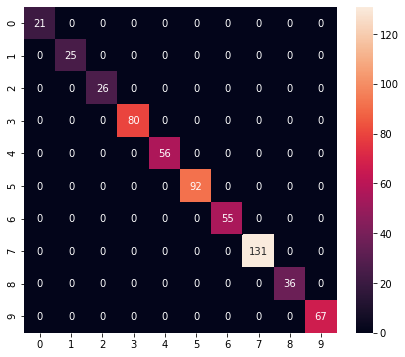

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        67

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7568

## Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 71 µs, sys: 24 µs, total: 95 µs
Wall time: 59.4 µs


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.7893789e-11 8.5839700e-15 1.3907677e-13 3.0774136e-16 9.9998653e-01
 8.7447106e-08 1.3257365e-09 1.2466205e-05 9.0319270e-07 2.0211358e-10]
4
